In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("large_data.csv")

types = {
  'ALLERGY': 0,
  'COLD': 1,
  'COVID': 2,
  'FLU': 3
}

X = np.asarray(data)[:,:-1]
y = np.asarray(data)[:,-1]
# y = np.asarray([types[val] for val in y])

# preprocessing - ICA
transformer = FastICA(n_components=4, random_state=42, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
cv = KFold(n_splits=50, random_state=42, shuffle=True)

In [3]:
print(X.shape)

(44453, 20)


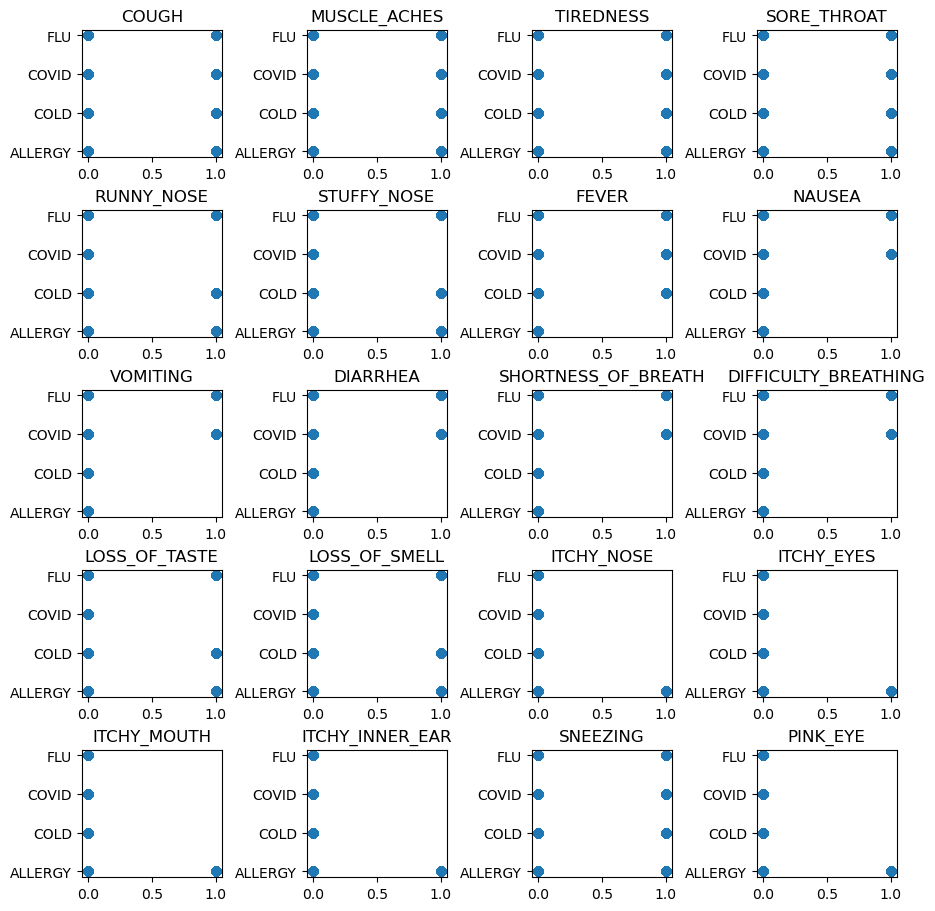

In [4]:
# show features
fig, ax = plt.subplots(5,4,figsize=(9,9),layout='constrained')

for index in range(20):
    plt.subplot(5,4,index+1)
    plt.scatter(X[:,index], y)
    plt.title(data.columns[index])

Text(0.5, 1.0, 'Correlation Matrix of Symptoms')

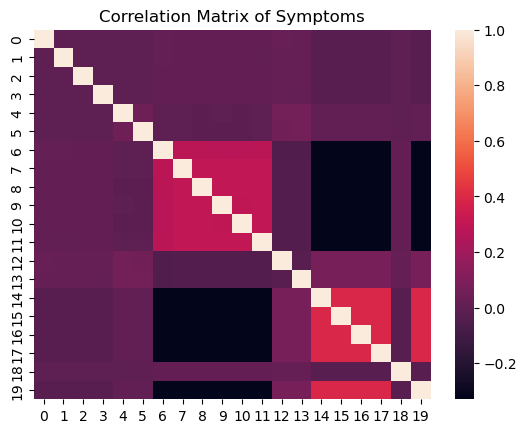

In [5]:
# correlation matrix
X_float = [x.astype(float) for x in X]
correlation = np.corrcoef(X_float, rowvar=False)

ax = sns.heatmap(data=correlation)
ax.set_title("Correlation Matrix of Symptoms")

In [6]:
# print out all symptoms
for i in range(20):
    print("index", i, "is", data.columns[i])

index 0 is COUGH
index 1 is MUSCLE_ACHES
index 2 is TIREDNESS
index 3 is SORE_THROAT
index 4 is RUNNY_NOSE
index 5 is STUFFY_NOSE
index 6 is FEVER
index 7 is NAUSEA
index 8 is VOMITING
index 9 is DIARRHEA
index 10 is SHORTNESS_OF_BREATH
index 11 is DIFFICULTY_BREATHING
index 12 is LOSS_OF_TASTE
index 13 is LOSS_OF_SMELL
index 14 is ITCHY_NOSE
index 15 is ITCHY_EYES
index 16 is ITCHY_MOUTH
index 17 is ITCHY_INNER_EAR
index 18 is SNEEZING
index 19 is PINK_EYE


In [7]:
# multi-classification
clf_lr = LogisticRegression(multi_class='multinomial')
clf_svm = LinearSVC()
clf_rf = RandomForestClassifier()
clf_kNN = KNeighborsClassifier()
clf_NN = MLPClassifier()

# unsupervised - clustering
clf_kmeans = KMeans()

all_classifiers = [clf_lr, clf_svm, clf_rf, clf_kNN, clf_NN, clf_kmeans]

# y_pred = clf.predict(X_test)
# y_pred_prob = clf.predict_proba(X_test)

In [8]:
scores_lr = []
scores_svm = []
scores_rf = []
scores_kNN = []
scores_NN = []
scores_kmeans = []

all_scores = [scores_lr, scores_svm, scores_rf, scores_kNN, scores_NN, scores_kmeans]

for index, clf in enumerate(all_classifiers):
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        all_scores[index].append(clf.score(X_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

In [9]:
print("Average Score for LR:", np.mean(scores_lr))
print("Average Score for SVM:", np.mean(scores_svm))
print("Average Score for RF:", np.mean(scores_rf))
print("Average Score for kNN:", np.mean(scores_kNN))
print("Average Score for NN:", np.mean(scores_NN))
# print("Average Score for KMeans:", np.mean(scores_kmeans))

Average Score for LR: 0.9281716358488896
Average Score for SVM: 0.9265964282554568
Average Score for RF: 0.8735969464491096
Average Score for kNN: 0.932625522933229
Average Score for NN: 0.92178238394358
